# Importing Libraries

In [2]:
import pandas as pd

#Loading the dataset
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

## Histplot

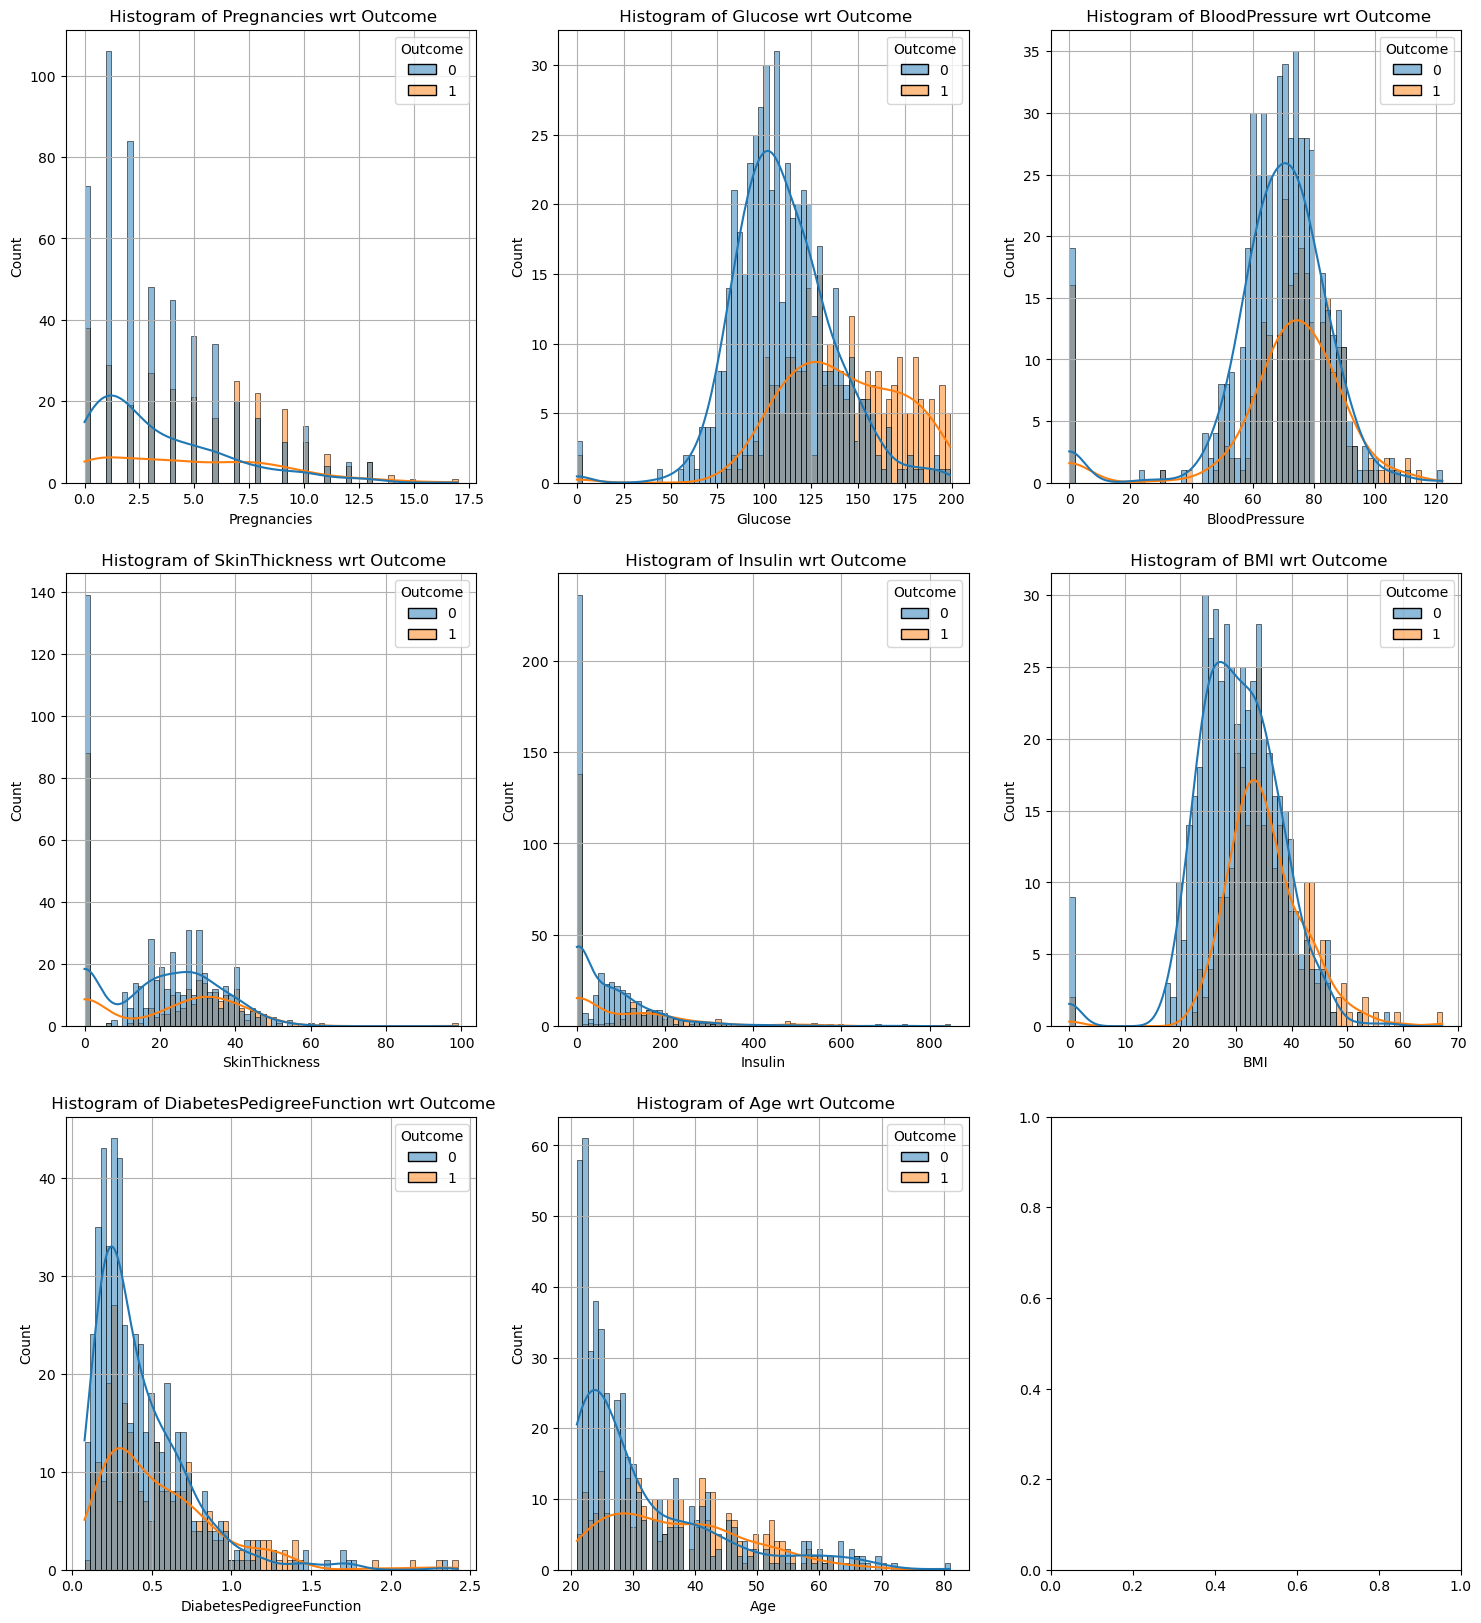

In [10]:
fig,axes=plt.subplots(3,3, figsize=(18, 20))

for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.histplot(data=df, x=df[df.columns[i]], hue=df.Outcome,ax=ax, bins=70, kde=True,)
    ax.set(xlabel=df.columns[i])
    ax.set_title(f" Histogram of {df.columns[i]} wrt Outcome")
    ax.grid(True)

## Boxplot

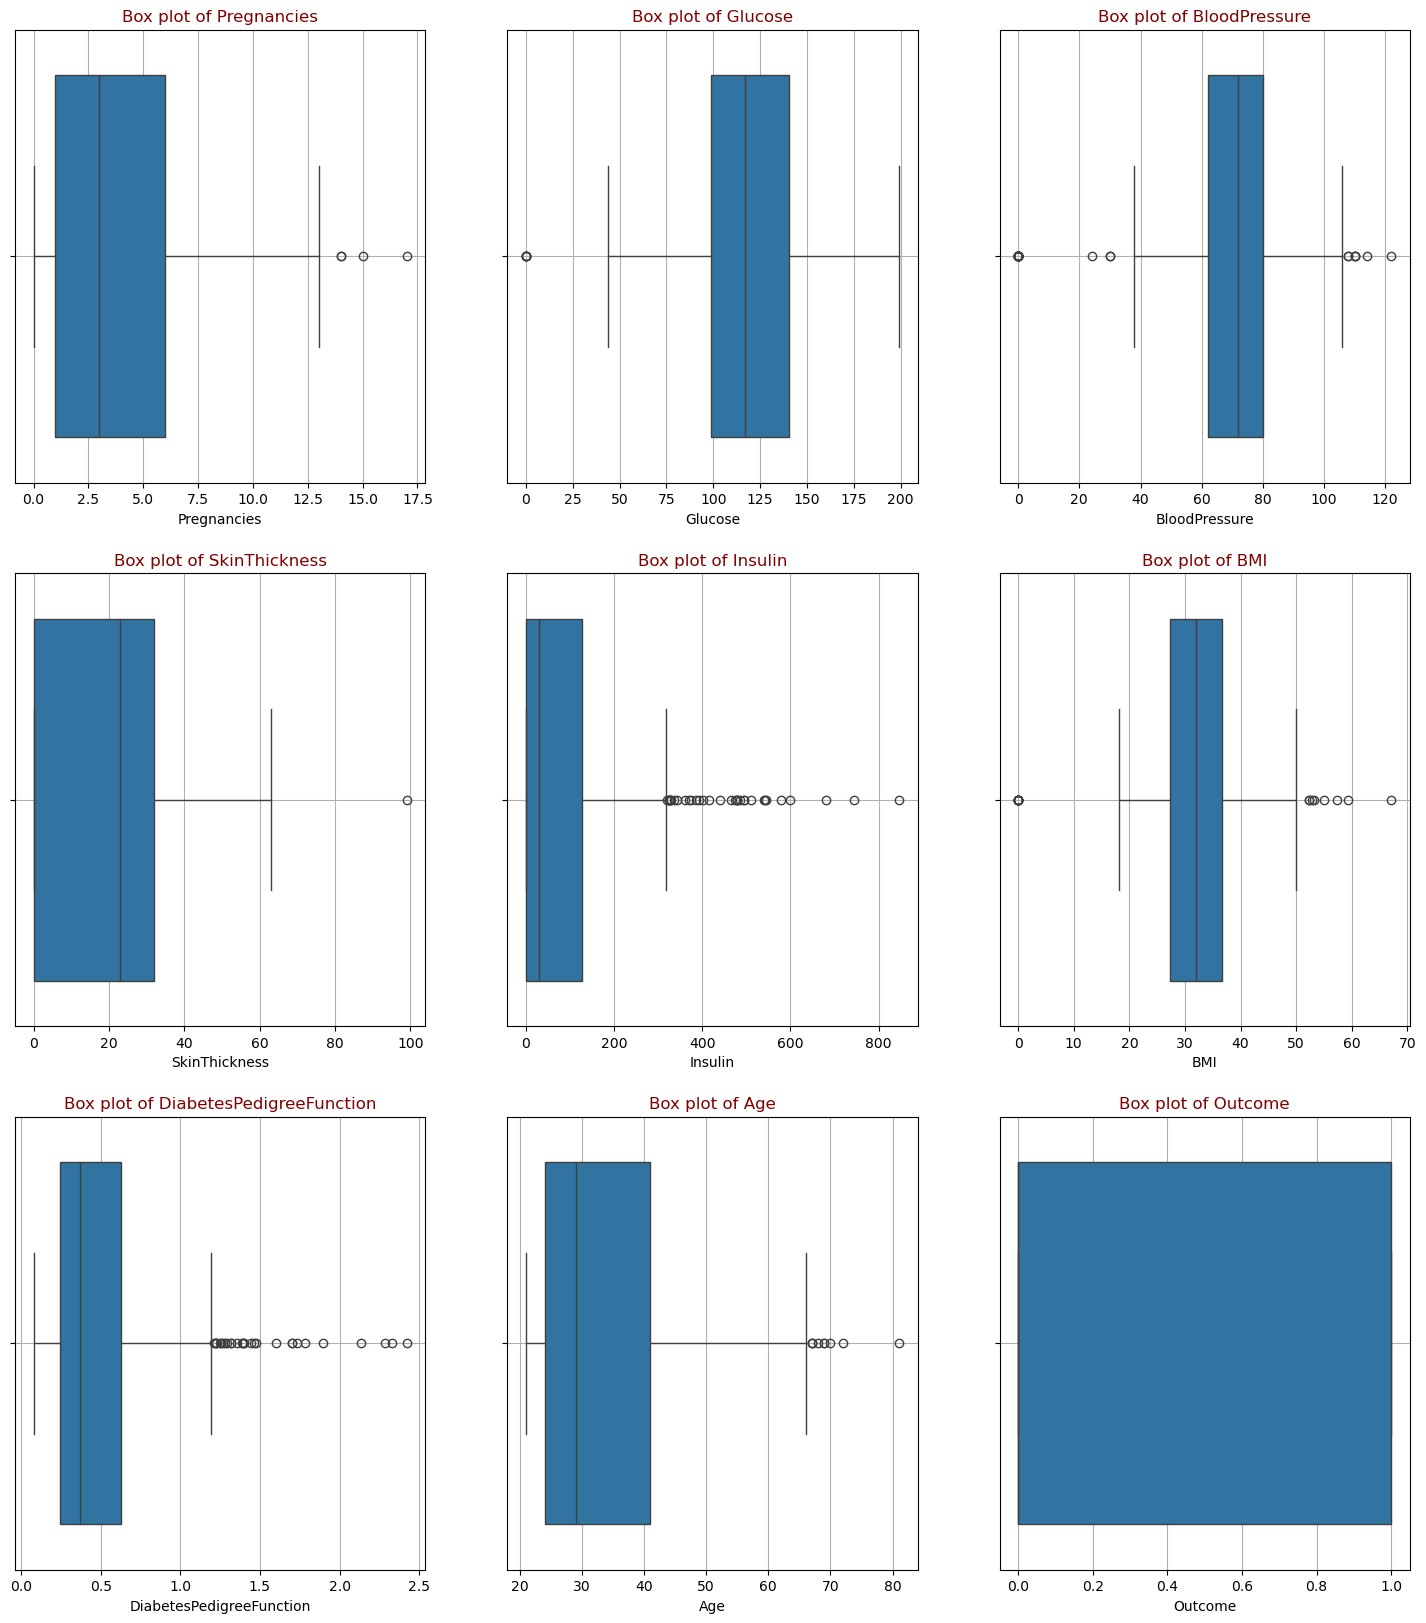

In [12]:
fig,axes=plt.subplots(3,3, figsize=(18, 20))

for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns):
        break
    sns.boxplot(data=df,x=df[df.columns[i]], ax=ax)
    ax.set_title(f"Box plot of {df.columns[i]}", color= 'maroon')
    ax.grid(True)

## Piechart

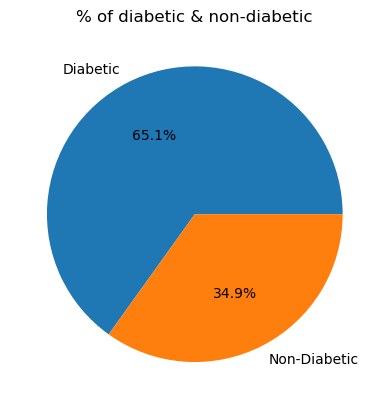

In [14]:
Outcome= df['Outcome'].value_counts()

plt.pie( Outcome, labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('% of diabetic & non-diabetic')

plt.show()

## Correlation Table

<Axes: >

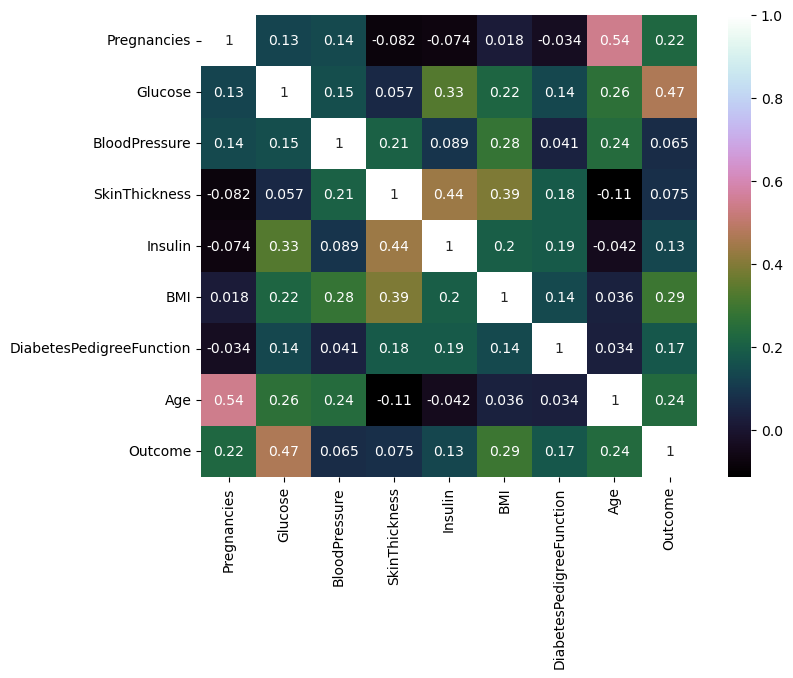

In [16]:
figure= plt.figure(figsize=((8,6)) )
sns.heatmap(df.corr(), annot =True, cmap='cubehelix')

# Feature Importance

In [18]:
X= df.loc[:, df.columns != 'Outcome']
Y= df['Outcome']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

ETC= ExtraTreesClassifier()
ETC.fit(X, Y)

ExtraTreesClassifier()

<Axes: >

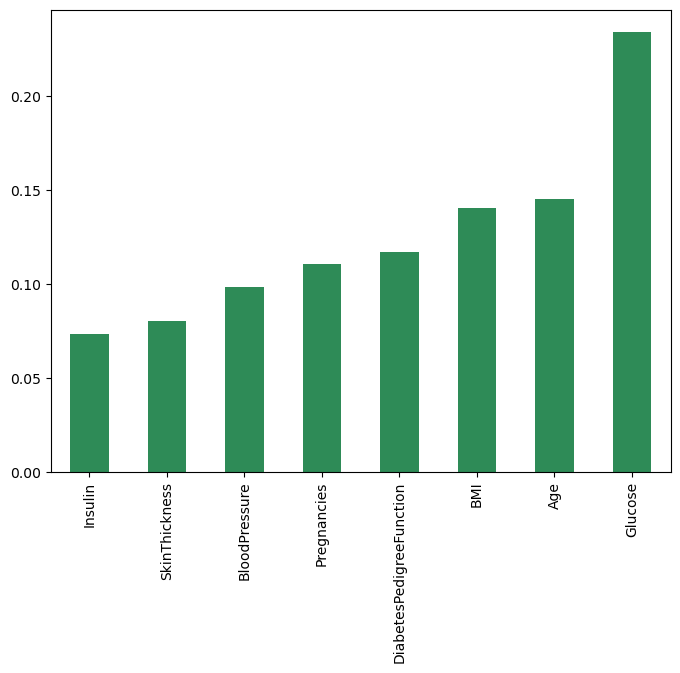

In [20]:
feat_importance= pd.Series( ETC.feature_importances_, index= X.columns)
feat_importance.sort_values().plot(kind= 'bar', color= 'seagreen', figsize=(8,6) )

# Cleaning the most important features [Glucose, BMI, DiabetesPedigreeFunction]

In [22]:
q1= df['Glucose'].quantile(0.25)
q3= df['Glucose'].quantile(0.75)

IQR= q3-q1

lower_bound= q1-1.5* IQR
upper_bound= q3+1.5* IQR

Df =df[df['Glucose'].between(lower_bound, upper_bound, inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
q1= Df['BMI'].quantile(0.25)
q3= Df['BMI'].quantile(0.75)

IQR= q3-q1

lower_bound= q1-1.5* IQR
upper_bound= q3+1.5* IQR

Df =Df[Df['BMI'].between(lower_bound, upper_bound, inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
q1= Df['DiabetesPedigreeFunction'].quantile(0.25)
q3= Df['DiabetesPedigreeFunction'].quantile(0.75)

IQR= q3-q1

lower_bound= q1-1.5* IQR
upper_bound= q3+1.5* IQR

Df =Df[Df['DiabetesPedigreeFunction'].between(lower_bound, upper_bound, inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# splitting the dataset into Training and Testing

In [26]:
from sklearn.model_selection import train_test_split

X= Df.loc[:, Df.columns != 'Outcome']
y=Df['Outcome']

print(X.shape)
print(y.shape)


(717, 8)
(717,)


In [27]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               717 non-null    int64  
 1   Glucose                   717 non-null    int64  
 2   BloodPressure             717 non-null    int64  
 3   SkinThickness             717 non-null    int64  
 4   Insulin                   717 non-null    int64  
 5   BMI                       717 non-null    float64
 6   DiabetesPedigreeFunction  717 non-null    float64
 7   Age                       717 non-null    int64  
 8   Outcome                   717 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.0 KB


In [28]:
Df['Pregnancies'] = Df['Pregnancies'].astype('object')
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               717 non-null    object 
 1   Glucose                   717 non-null    int64  
 2   BloodPressure             717 non-null    int64  
 3   SkinThickness             717 non-null    int64  
 4   Insulin                   717 non-null    int64  
 5   BMI                       717 non-null    float64
 6   DiabetesPedigreeFunction  717 non-null    float64
 7   Age                       717 non-null    int64  
 8   Outcome                   717 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 56.0+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_16088\2716520524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Pregnancies'] = Df['Pregnancies'].astype('object')


In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline,FeatureUnion

In [30]:
Df.Pregnancies= Df.Pregnancies.astype('object')
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               717 non-null    object 
 1   Glucose                   717 non-null    int64  
 2   BloodPressure             717 non-null    int64  
 3   SkinThickness             717 non-null    int64  
 4   Insulin                   717 non-null    int64  
 5   BMI                       717 non-null    float64
 6   DiabetesPedigreeFunction  717 non-null    float64
 7   Age                       717 non-null    int64  
 8   Outcome                   717 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 56.0+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_16088\1497710363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.Pregnancies= Df.Pregnancies.astype('object')


# Building the pipeline for custom data handing

In [32]:
numeric_features_mm = ['DiabetesPedigreeFunction', 'Age']
numeric_features_std = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
categorical_features = ['Pregnancies']

In [33]:
CT=  ColumnTransformer(transformers=[
    ('minmax', MinMaxScaler(), numeric_features_mm),
    ('standard', StandardScaler(), numeric_features_std),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1), categorical_features)
], remainder='drop')

CT           

ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                 ['DiabetesPedigreeFunction', 'Age']),
                                ('standard', StandardScaler(),
                                 ['Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI']),
                                ('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Pregnancies'])])

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .20, random_state=13)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(573, 8)
(144, 8)
(573,)
(144,)


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               717 non-null    int64  
 1   Glucose                   717 non-null    int64  
 2   BloodPressure             717 non-null    int64  
 3   SkinThickness             717 non-null    int64  
 4   Insulin                   717 non-null    int64  
 5   BMI                       717 non-null    float64
 6   DiabetesPedigreeFunction  717 non-null    float64
 7   Age                       717 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.4 KB


In [36]:
y.info()

<class 'pandas.core.series.Series'>
Index: 717 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
717 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


# Hyperparameter range

In [38]:
param_rs_gs_dt = {'model__criterion':['entropy','gini'],
            'model__max_depth': range(4,12),
            'model__splitter': ['best','random']
}

param_rs_gs_knn = { 'model__n_neighbors': [i for i in range(3,15,2)],
                   'model__weights': ['uniform','distance'],
                   'model__metric': ['euclidean','manhattan','minkowski']
} 


In [39]:
models= {'Logistic Regression':Pipeline([('transformer',CT),('model',LogisticRegression())]),
         
         'Decision Tree Classifier':Pipeline([('transformer',CT),('model',DecisionTreeClassifier(criterion='entropy',splitter='best'))]),
         
         'KNN Classifier':Pipeline([('transformer',CT),('model',KNeighborsClassifier(n_neighbors=13))]),
         
         'RandomForest Classifier':Pipeline([('transformer',CT),('model',RandomForestClassifier(n_estimators=121,criterion='entropy',))]),
         
         'ExtraTree Classifier':Pipeline([('transformer',CT),('model',ExtraTreesClassifier(n_estimators=121,criterion='entropy',random_state=13,))]),
         
         'Naive Bayes':Pipeline([('transformer',CT),('model',GaussianNB())]),
         
         'DecisionTreeClassifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                                          
                                                         param_distributions=param_rs_gs_dt,
                                                         cv=7,
                                                         random_state=13,
                                                         n_iter=11),
         
         'DecisionTreeClassifier_GSDT':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                                   param_grid=param_rs_gs_dt,
                                                   cv=7,),
         
         'KNNClassifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                                param_distributions=param_rs_gs_knn,
                                                random_state=13,),
         
         'KNNClassifier_GSCV':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                          param_grid=param_rs_gs_knn,
                                          cv =7,),
         
         'SVM':Pipeline([('transformer',CT),('model',SVC(kernel='poly',degree=3,probability=True))]),
        }

models.items()

dict_items([('Logistic Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('standard', StandardScaler(),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI']),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Pregnancies'])])),
                ('model', LogisticRegression())])), ('Decision Tree Classifier', Pipeline(steps=[('tra

## model training and comparing the performance with the classification models by ROC curve and AUC curve 

Fitting model: Logistic Regression
model name:: Logistic Regression
Accuracy score of Logistic Regression is 0.7777777777777778
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        99
           1       0.64      0.67      0.65        45

    accuracy                           0.78       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.78      0.78      0.78       144

********************************************************************************************************************************************
********************************************************************************************************************************************
Fitting model: Decision Tree Classifier
model name:: Decision Tree Classifier
Accuracy score of Decision Tree Classifier is 0.7361111111111112
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           

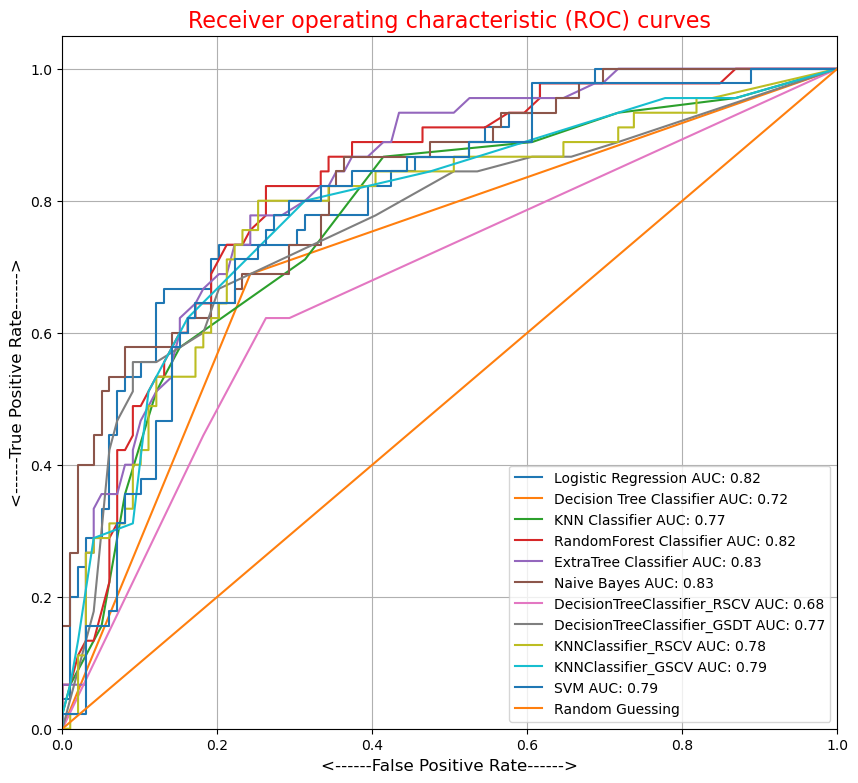

In [41]:
figure= plt.figure(figsize=(10,9) )

for model_name, model in models.items():
    print(f'Fitting model: {model_name}')

    if isinstance(model, (GridSearchCV, RandomizedSearchCV)):
        model.fit(X_train, y_train)
        best_model= model.best_estimator_
        print(f"Best parameter for {model_name}: {model.best_params_}")
    else:
        best_model= model
        best_model.fit(X_train, y_train)

    y_pred= best_model.predict(X_test)
    y_pred_proba= best_model.predict_proba(X_test)[:,1]


    fpr, tpr,_= roc_curve(y_test, y_pred_proba)
    roc_auc= auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} AUC: {roc_auc:.2f}")


    print(f"model name:: {model_name}")
    print(f"Accuracy score of {model_name} is {accuracy_score(y_test, y_pred)}")

    print(classification_report(y_test, y_pred))
    print('*******' *20)
    print('*******' *20)

plt.plot([0,1], [0,1], label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('<------False Positive Rate------>', fontsize= 12)
plt.ylabel('<------True Positive Rate------>', fontsize= 12)
plt.title('Receiver operating characteristic (ROC) curves', fontsize=16, color='red')

plt.legend(loc='best')
plt.grid(True)
plt.show()



### SVM performed the best with AUC score of 0.84

## Using Neural Network

In [44]:
transformed= CT.fit_transform(Df)
X= transformed
y= Df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)
print(f'x_train: {X_train.shape}')
print(f'x_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')



x_train: (573, 8)
x_test: (144, 8)
y_train: (573,)
y_test: (144,)


In [45]:
import tensorflow as tf

## ANN model building

In [47]:
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense, Dropout
from tensorflow.keras.models import Sequential

model= tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)),

    tf.keras.layers.Dropout(.13),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)), 

    tf.keras.layers.Dropout(.13),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,651 (22.07 KB)

 Trainable params: 5,651 (22.07 KB)

 Non-trainable params: 0 (0.00 B)

## ANN model Training

In [49]:
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'],)
M = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=15,)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6097 - loss: 0.7556 - val_accuracy: 0.7500 - val_loss: 0.6486
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7244 - loss: 0.6614 - val_accuracy: 0.7847 - val_loss: 0.5523
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7470 - loss: 0.5883 - val_accuracy: 0.7778 - val_loss: 0.4885
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7701 - loss: 0.5284 - val_accuracy: 0.7917 - val_loss: 0.4621
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7558 - loss: 0.5508 - val_accuracy: 0.8333 - val_loss: 0.4569
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7341 - loss: 0.5527 - val_accuracy: 0.7778 - val_loss: 0.4587
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7575 - loss: 0.5155 - val_accuracy: 0.7778 - val_loss: 0.4579
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7872 - loss: 0.4986 - val_accuracy: 0.8333 - val_los

In [50]:
print("train score: ", model.evaluate(X_train, y_train))
print("test score: ", model.evaluate(X_test, y_test))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.4908 
train score:  [0.4731430411338806, 0.7870855331420898]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8171 - loss: 0.4173 
test score:  [0.43986713886260986, 0.8055555820465088]


## Neural Network model performance
1. loss curve Trainging vs validation/testing loss.
2. Accuracy Curve. Training vs validaton/training Accuracy
3. ROC curve

#### 1. Loss curve

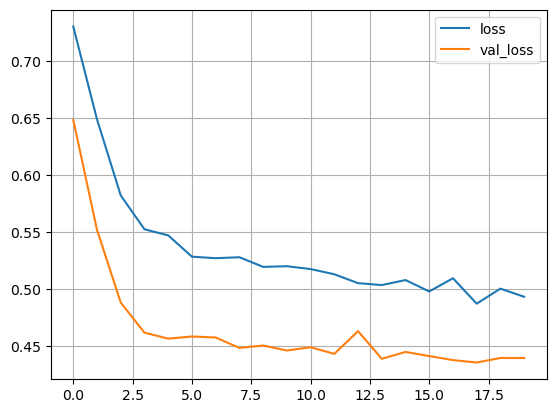

In [53]:
plt.plot(M. history['loss'], label='loss')
plt.plot(M.history['val_loss'], label= 'val_loss')
plt.legend()
plt.grid(True)
plt.show()


## 2. Accuarcy curve

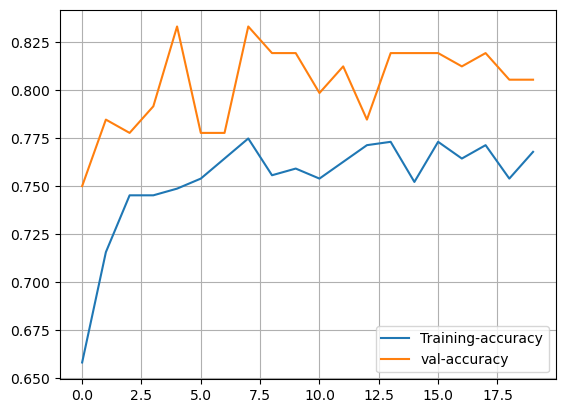

In [55]:
plt.plot(M.history['accuracy'], label='Training-accuracy')
plt.plot(M.history['val_accuracy'], label= 'val-accuracy')
plt.legend()
plt.grid(True)
plt.show()

## ROC curve

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


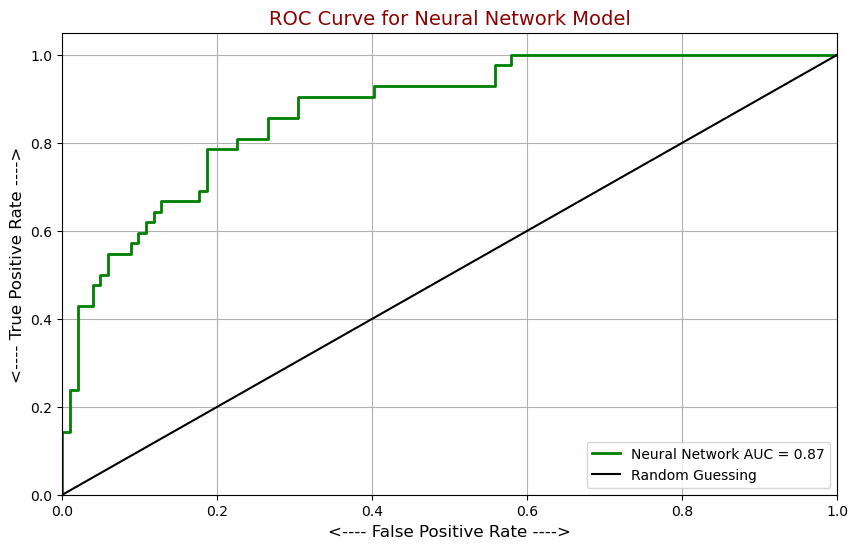

In [57]:
y_pred_proba = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Neural Network AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='-', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('<---- False Positive Rate ---->', fontsize=12)
plt.ylabel('<---- True Positive Rate ---->', fontsize=12)
plt.title('ROC Curve for Neural Network Model', fontsize=14, color='darkred')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [127]:
new_data = pd.DataFrame([{
    'Pregnancies': '3',
    'Glucose': 90,
    'BloodPressure': 80,
    'SkinThickness': 120,
    'Insulin': 125,
    'BMI': 60.0,
    'DiabetesPedigreeFunction': 0.89,
    'Age': 80
}])

# Transforming the input using the already-fitted ColumnTransformer
transformed_input = CT.transform(new_data)

# Predicting the probability and class
predicted_proba = model.predict(transformed_input)[0][0]
predicted_class = int(predicted_proba >= 0.5)

print(f"Predicted Probability of Diabetes: {predicted_proba:.2f}")
print(f"Predicted Class (0 = No Diabetes, 1 = Diabetes): {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Probability of Diabetes: 0.37
Predicted Class (0 = No Diabetes, 1 = Diabetes): 0
